In [ ]:
#Librerías usadas
import requests #para web scraping
from bs4 import BeautifulSoup # para web scraping
import spacy # para lematización
import pandas as pd #para dataframes

In [ ]:
#Lista con los nombres de los estados usados, para mantener consistencia
estados = ["Edomex","CDMX","Jalisco", "Veracruz", "Puebla", "Guanajuato", "NuevoLeon", "Chiapas", "Michoacan", "Oaxaca"]

In [ ]:
#Función para obtener los links de los archivos .txt
links_estados = {}
def getLinks():

    with open("linksEdomex.txt", "r", encoding="utf-8") as f:
        links_estados["Edomex"] = f.readlines()
    with open("linksCDMX.txt", "r", encoding="utf-8") as f:
        links_estados["CDMX"] = f.readlines()
    with open("linksVeracruz.txt", "r", encoding="utf-8") as f:
        links_estados["Veracruz"] = f.readlines()
    with open("linksJalisco.txt", "r", encoding="utf-8") as f:
        links_estados["Jalisco"] = f.readlines()
    with open("linksPuebla.txt", "r", encoding="utf-8") as f:
        links_estados["Puebla"] = f.readlines()
    with open("linksGuanajuato.txt", "r", encoding="utf-8") as f:
        links_estados["Guanajuato"] = f.readlines()
    with open("linksNuevoLeon.txt", "r", encoding="utf-8") as f:
        links_estados["NuevoLeon"] = f.readlines()
    with open("linksChiapas.txt", "r", encoding="utf-8") as f:
        links_estados["Chiapas"] = f.readlines()
    with open("linksMichoacan.txt", "r", encoding="utf-8") as f:
        links_estados["Michoacan"] = f.readlines()
    with open("linksOaxaca.txt", "r", encoding="utf-8") as f:
        links_estados["Oaxaca"] = f.readlines()


In [ ]:
#Web scraping
getLinks() #obtener los links de los archivos de cada estado
headers = {}

#Agrega headers de navegador a las búsquedas para que las páginas no bloqueen las querys
browser_headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/123.0.0.0 Safari/537.36"
    ),
    "Accept-Language": "en-US,en;q=0.9",
}

for estado in links_estados:
    headers_estado = []
    for url in links_estados[estado]:
        url = url.strip()
        try:
            response = requests.get(url, headers=browser_headers, timeout = 300)
            response.raise_for_status()
            soup = BeautifulSoup(response.content, "lxml")

            title_tag = soup.find("title")
            if title_tag and title_tag.get_text(strip=True):
                title = title_tag.get_text(strip=True)
            else:
                og_title = soup.find("meta", property="og:title")
                if og_title and og_title.get("content"):
                    title = og_title["content"].strip()
                else:
                    print(f"No title found for {url}")
                    title = "No title found"

            headers_estado.append(title)

        except requests.exceptions.HTTPError as http_err:
            print(f"HTTP error for {url}: {http_err}")
        except requests.exceptions.RequestException as req_err:
            print(f"Request failed for {url}: {req_err}")
        except Exception as e:
            print(f"Unexpected error for {url}: {e}")

    headers[estado] = headers_estado

No title found for https://imagendelgolfo.mx/xalapa/laboratorios-privados-en-xalapa-no-aplican-pruebas-de-coronavirus/50003054
No title found for https://imagendelgolfo.mx/estado/por-coronavirus-permanecen-cerradas-instalaciones-del-crit-poza-rica/50008231
No title found for https://imagendelgolfo.mx/estado/ayuntamiento-de-orizaba-reducira-personal-por-covid-19/50003748
No title found for https://imagendelgolfo.mx/estado/plaza-valle-cierra-sus-puertas-por-covid-19-en-orizaba/50005746
No title found for https://imagendelgolfo.mx/estado/refuerza-tec-de-alamo-acciones-contra-el-coronavirus/50006342
No title found for https://imagendelgolfo.mx/estado/exhortan-en-poza-rica-a-transportistas-cuidar-medidas-sanitarias/50009928
No title found for https://imagendelgolfo.mx/estado/mantiene-semar-acciones-de-vigilancia-por-pandemia-en-tuxpan/50010906
No title found for https://imagendelgolfo.mx/estado/planta-akwel-detiene-operaciones-en-el-centro-de-veracruz/50005795
No title found for https://ima

In [ ]:
#creamos todos los archivos para guardar los headers
#Sólo se corre una vez
for i in headers:
    name = "headers" + i + ".txt"
    with open(name, "w", encoding="utf-8") as f:
        for head in headers[i]:
            f.write(head + "\n")

In [ ]:
file_names = []
for i in estados:
    file_names.append("headers" + i +".txt")

#después de terminar de limpiar manualmente los datos, actualizamos las variables
#Consideramos que la información está en los archivos, ya sin correr el scraping
#Volvemos a declarar el diccionario de headers, para manipular más fácil

headers = {}

for filename in file_names:
    with open(filename, "r", encoding="utf-8") as f:
        state = filename.removeprefix("headers").removesuffix(".txt")
        headers[state] = [line.strip() for line in f if line.strip()]

## Análisis de palabras ##

In [ ]:
#Lemmatizar y stemmizar
import spacy
from nltk.stem.snowball import SpanishStemmer

nlp = spacy.load("es_core_news_sm")
stemmer = SpanishStemmer()

def lemmatize_and_stem(text, remove_stopwords=True):
    doc = nlp(text)
    result = []

    for token in doc:
        if token.is_punct or token.is_space:
            continue

        if remove_stopwords and token.is_stop:
            continue

        lemma = token.lemma_.lower()
        stem = stemmer.stem(lemma)

        result.append(stem)

    return result


In [ ]:
d = []
for i in range(0, 10):
    d.append({})
    
palabras_estado = dict(zip(estados, d))

nlp = spacy.load("es_core_news_sm")

for estado in headers:
    for header in headers[estado]:
        lmm_hedaer = lemmatize_and_stem(header.lower())

        for l in lmm_hedaer:
            if l.isdigit():
                continue  # Para evitar números
            
            if l not in palabras_estado[estado]:
                palabras_estado[estado][l] = 1
            else:
                palabras_estado[estado][l] += 1

    palabras_estado[estado] = dict(sorted(palabras_estado[estado].items(), key=lambda x: x[1], reverse=True))  # Ordenar de forma descendente


In [48]:
#creamos todos los archivos para guardar la información de los headers
#Sólo se corre una vez
for estado in palabras_estado:
    name = "palabras" + estado + ".txt"
    with open(name, "w", encoding="utf-8") as f:
        for palabra in palabras_estado[estado]:
            f.write(palabra + "," + str(palabras_estado[estado][palabra]) + '\n')

In [33]:
all_words = dict()
for estado in headers:
    for k in palabras_estado[estado]:
        if k not in all_words:
            all_words[k] = 0
        
        all_words[k] += palabras_estado[estado][k]


#ordenar las palabras más frecuentes
all_words_sorted = dict(sorted(all_words.items(), key=lambda x: x[1], reverse=True))  # By value, descending

for l in all_words_sorted:
    print(l, all_words_sorted[l])


covid-19 373
coronavirus 235
cas 115
mexic 82
hospital 80
pandemi 79
cerr 78
puebl 57
contingent 54
salud 51
med 49
san 43
suspend 40
contagi 37
cdmx 34
cuarenten 33
medic 31
imss 31
veracruz 29
atend 28
sanitari 28
leon 28
map 27
cov 25
ped 24
sant 24
pacient 24
merc 23
oaxac 23
trabaj 22
emergent 22
activ 21
personal 21
pes 21
covid19 21
abril 20
public 20
fas 19
chiap 19
michoacan 19
municipi 18
centr 18
guadalaj 18
call 17
transport 17
oms 17
pobl 17
edomex 16
servici 16
apoy 16
penal 15
posit 15
aplic 15
ofrec 15
distanci 15
mil 14
priv 14
viv 14
enfrent 14
general 14
prevent 14
virus 14
covid–19 14
moreli 14
person 13
confirm 13
visit 13
prevencion 13
atencion 13
cubreboc 13
agu 13
line 12
evit 12
restring 12
pas 12
polic 12
seman 12
fallec 12
cancel 12
cruz 12
jalisc 12
toluc 11
vall 11
falt 11
tianguis 11
mexican 11
emple 11
registr 11
luc 11
econom 11
mor 11
indigen 11
equip 11
año 11
instal 11
clas 11
marz 10
aument 10
negoci 10
sum 10
entreg 10
deten 10
famili 10
clinic 10
p

In [ ]:
#Datos de COVID en cada estado, del 15 de marzo al 7 de mayo del 2020
cases_map = {
    "CDMX": 13366,
    "Chiapas": 404,
    "Edomex": 9246,
    "Guanajuato": 502,
    "Jalisco": 587,
    "Michoacan": 603,
    "NuevoLeon": 582,
    "Oaxaca": 355,
    "Puebla": 1228,
    "Veracruz": 1562
}

poblacion_mexico_2020 = {
    "Chiapas": 5543828,
    "Guanajuato": 6166934,
    "Jalisco": 8348151,
    "CDMX": 9_209_944,
    "Edomex": 16_992_418,
    "Michoacan": 4_748_846,
    "NuevoLeon": 5_784_442,
    "Oaxaca": 4_132_148,
    "Puebla": 6_583_278,
    "Veracruz": 8_062_579,
}

percentage_infected = {}

for estado in estados:
    percentage_infected[estado] = cases_map[estado] * 100 / poblacion_mexico_2020[estado]


In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

# 1. Prepare state-wise documents
documents = [" ".join(headers[estado]) for estado in estados]


In [38]:
# 2. TF-IDF with Spanish stopwords, filtering out words that appear in <2 states
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words=spanish_stopwords,
    min_df = 5  # must appear in at least 2 documents (states)
)


tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# 3. Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=estados, columns=feature_names)

# 4. Add COVID case target
tfidf_df["Porcentaje de infectados"] = tfidf_df.index.map(percentage_infected)

tfidf_df

,10,19,25,30,abasto,acceso,actividad,actividades,agua,apoyo,...,tres,universidades,van,ventas,vida,violencia,virus,vive,zona,Porcentaje de infectados
Edomex,0.013963,0.596228,0.015446,0.015446,0.030891,0.012679,0.013963,0.023093,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013963,0.000000,0.000000,0.000000,0.054413
CDMX,0.029430,0.618206,0.016277,0.000000,0.032555,0.013362,0.014715,0.000000,0.000000,0.016277,...,0.029430,0.000000,0.016277,0.016277,0.000000,0.000000,0.048832,0.016277,0.032555,0.145126
Jalisco,0.000000,0.607172,0.000000,0.000000,0.000000,0.013802,0.015200,0.000000,0.000000,0.033628,...,0.030400,0.000000,0.016814,0.016814,0.000000,0.015200,0.084069,0.000000,0.016814,0.007031
Veracruz,0.000000,0.557251,0.000000,0.000000,0.000000,0.022960,0.025285,0.062726,0.000000,0.083908,...,0.050570,0.000000,0.000000,0.027969,0.000000,0.025285,0.000000,0.000000,0.055939,0.019373
Puebla,0.015839,0.545439,0.000000,0.017521,0.000000,0.000000,0.000000,0.013098,0.105126,0.017521,...,0.015839,0.017521,0.000000,0.000000,0.017521,0.000000,0.000000,0.000000,0.000000,0.018653
Guanajuato,0.030323,0.584740,0.033542,0.000000,0.000000,0.000000,0.030323,0.075223,0.000000,0.000000,...,0.030323,0.033542,0.067084,0.000000,0.067084,0.000000,0.000000,0.000000,0.000000,0.008140
NuevoLeon,0.023068,0.333632,0.051034,0.051034,0.025517,0.020947,0.000000,0.019075,0.051034,0.025517,...,0.000000,0.000000,0.025517,0.000000,0.025517,0.023068,0.076551,0.025517,0.000000,0.010061
Chiapas,0.030353,0.522604,0.000000,0.033575,0.000000,0.027561,0.000000,0.025099,0.100725,0.000000,...,0.091058,0.033575,0.000000,0.033575,0.033575,0.060705,0.000000,0.033575,0.033575,0.007287
Michoacan,0.000000,0.613958,0.000000,0.070436,0.035218,0.000000,0.031838,0.052654,0.035218,0.000000,...,0.000000,0.035218,0.000000,0.000000,0.000000,0.000000,0.070436,0.105654,0.000000,0.012698
Oaxaca,0.000000,0.584636,0.044715,0.000000,0.022357,0.018353,0.000000,0.016713,0.067072,0.000000,...,0.000000,0.022357,0.022357,0.022357,0.044715,0.020211,0.022357,0.022357,0.022357,0.008591


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming `tfidf_df` and `feature_names` are already defined

# 5. Split features and target
X = tfidf_df.drop(columns=["Porcentaje de infectados"])
y = tfidf_df["Porcentaje de infectados"]

# Optional: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train Decision Tree Regressor
reg = DecisionTreeRegressor( random_state = 20)
reg.fit(X_scaled, y)

# 7. Evaluate (cross-validation)
scores = cross_val_score(reg, X_scaled, y, cv=5, scoring='r2')
print("Cross-validated R^2:", scores.mean())

# 8. Show top features (important words)
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances

# Top 5 important words
top_words = [feature_names[i] for i in indices[:100]]  # Top 5 words
top_importances = importances[indices[:100]]

# Print top 5 important words and their importances
print("Top 100 important words and their importance values:")
for word, importance in zip(top_words, top_importances):
    print(f"{word}")


Cross-validated R^2: -104.19646761421286
Top 100 important words and their importance values:
casa
pandemia
privados
30
apoyo
personas
agua
frente
vive
zona
transporte
trabajo
tianguis
virus
van
universidades
vida
violencia
suspenden
suspende
servicios
sucursales
semana
santa
sanitarias
servicio
sanitaria
sana
salud
temen
taxistas
suspensión
tres
ventas
protección
público
primer
preventivas
plena
piden
positivo
poder
pese
pide
personal
parque
pacientes
ofrece
nueva
negocios
méxico
médicos
médico
municipios
mundo
mujeres
mil
mercados
mercado
medidas
medida
san
riesgo
reportan
suspender
tras
insumos
juárez
luce
línea
mar
imss
hospitales
hoy
gobierno
general
federal
fase
horas
hacer
guerrero
hospital
equipo
entrega
enfrentar
emergencia
economía
dos
distancia
dan
da
cómo
cubrebocas
cuarentena
falta
evitar
eventos
estudiantes
coronavirus
covid


In [52]:
import pandas as pd

# 1. Build the word frequency DataFrame
data = {}
for state in palabras_estado:
    state_data = {}
    for word in top_words:
        state_data[word] = palabras_estado[state].get(word, 0)  # get frequency or 0 if missing
    data[state] = state_data

word_freq_df = pd.DataFrame.from_dict(data, orient='index')

# 2. Add COVID cases as a new column
word_freq_df["covid_cases"] = pd.Series(percentage_infected)

# 3. Calculate the correlation matrix
correlation_matrix = word_freq_df.corr()

# 4. Get the correlation of each word with covid_cases
word_correlations = correlation_matrix["covid_cases"].drop("covid_cases")

# 5. Sort by absolute correlation (to get both positive and negative correlations)
top_correlated_words = word_correlations.abs().sort_values(ascending=False)

# 6. Display the words most correlated with COVID cases
print("Top correlated words with COVID cases:")
print(top_correlated_words.head(50))

# Optional: See the actual correlation (positive or negative)
print("\nWith sign:")
print(word_correlations.loc[top_correlated_words.head(50).index])


Top correlated words with COVID cases:
hospital         0.526481
general          0.521344
mil              0.248914
tianguis         0.239851
salud            0.212318
virus            0.183760
san              0.170471
federal          0.162313
coronavirus      0.147676
imss             0.130704
mar              0.097195
cruz             0.095752
personal         0.010047
casa                  NaN
pandemia              NaN
privados              NaN
30                    NaN
acceso                NaN
zona                  NaN
vive                  NaN
van                   NaN
vida                  NaN
transporte            NaN
trabajo               NaN
temen                 NaN
taxistas              NaN
universidades         NaN
tres                  NaN
violencia             NaN
suspenden             NaN
suspende              NaN
servicios             NaN
sucursales            NaN
semana                NaN
santa                 NaN
sanitarias            NaN
servicio              NaN

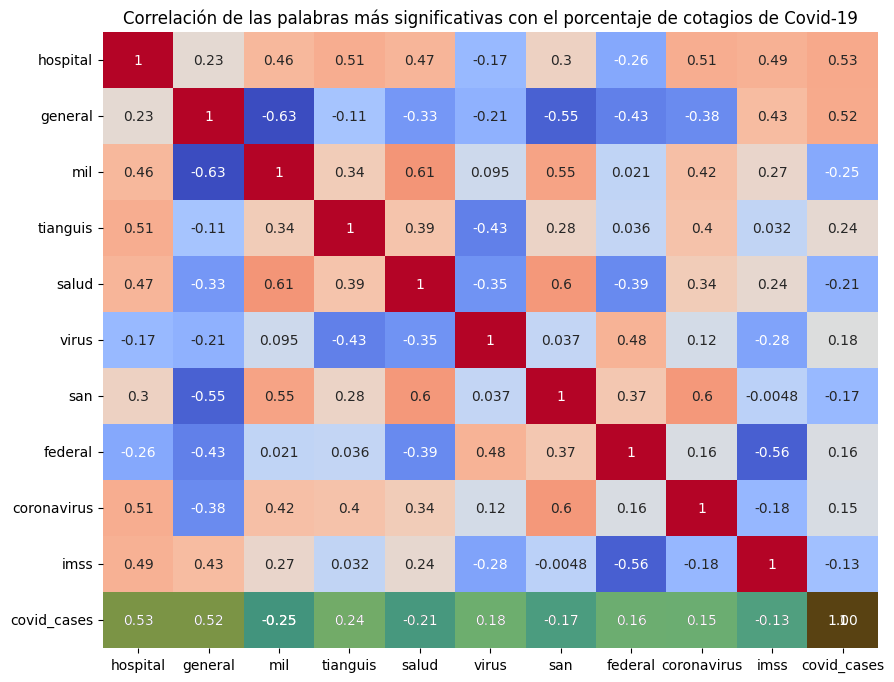

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example heatmap data (you can use your correlation matrix directly)
corr_matrix = word_freq_df[top_correlated_words.head(10).index.tolist() + ["covid_cases"]].corr()

# Create a mask for the whole matrix (False = show, True = hide)
mask = np.zeros_like(corr_matrix, dtype=bool)

# Create a mask where only the last row is False (shown)
mask[:-1, :] = True  # only keep the last row visible

# Plot the heatmap normally
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=False)

# Overlay the last row in green
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=sns.color_palette(["green"]),
    cbar=False,
    annot_kws={"color": "white"},  # adjust annotation color if needed
    alpha=0.5
)

plt.title("Correlación de las palabras más significativas con el porcentaje de cotagios de Covid-19")
plt.show()


In [45]:
from transformers import pipeline

# Load the sentiment analysis pipeline with BETO fine-tuned
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

d = {i: 0 for i in range(1, 6)}

scores = {}
for estado in estados:
    scores[estado] = d.copy()

total_score_state = {}

for estado in estados:
    total_score = 0
    print("//", estado)
    scored_headers = {}

    results = classifier(headers[estado])
    
    for result in results:
        label = result["label"]
        score = int(label[0])
        scores[estado][score] += 1

        total_score += int(score)
        #print(i)
    
    total_score_state[estado] = total_score

    print("score:", total_score)


Device set to use cpu


// Edomex
score: 288
// CDMX
score: 343
// Jalisco
score: 303
// Veracruz
score: 225
// Puebla
score: 279
// Guanajuato
score: 316
// NuevoLeon
score: 333
// Chiapas
score: 309
// Michoacan
score: 270
// Oaxaca
score: 285


#### Mapa de positividad ###

In [58]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Ensure you have scores as a dict of dicts:
# Example:
# scores = {'AGUASCALIENTES': {1: 10, 2: 5, 3: 8, 4: 7, 5: 3}, ...}
# covid_percentage = {'AGUASCALIENTES': 5.5, ...}

# Extract all score levels
score_levels = sorted({score for state_scores in scores.values() for score in state_scores})

# Build DataFrame
data = []
for estado in estados:
    row = {f"score_{score}": scores[estado].get(score, 0) for score in score_levels}
    row['covid_percentage'] = covid_percentage[estado]
    row['estado'] = estado
    data.append(row)

df = pd.DataFrame(data)

# Check data
print(df.head())

# ✅ Correlation matrix
corr_matrix = df.drop(columns='estado').corr()
print(corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Scores vs COVID %")
plt.show()

# ✅ Linear Regression per score level
X = df[[f"score_{score}" for score in score_levels]]
y = df["covid_percentage"]

model = LinearRegression()
model.fit(X, y)

print("\nRegression coefficients:")
for i, score in enumerate(score_levels):
    print(f"Score {score}: {model.coef_[i]:.4f}")

print(f"Intercept: {model.intercept_:.4f}")

# Optionally check R² score
r2 = model.score(X, y)
print(f"\nR² Score: {r2:.4f}")


AttributeError: 'numpy.ndarray' object has no attribute 'values'

<Axes: >

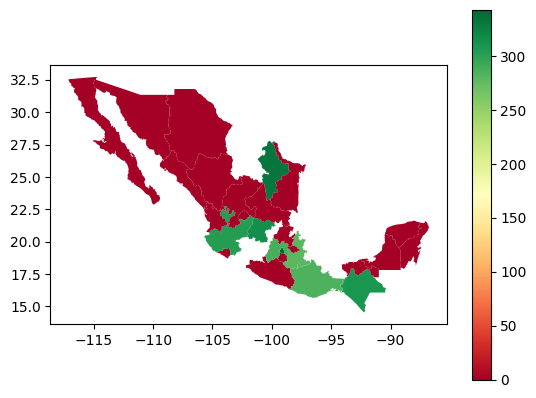

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

mapaMxgj = gpd.read_file("https://github.com/jincera/CosasGeoref/raw/main/MapaMexico3.geojson")

# 2. Create DataFrame from your dictionary
positiveness_by_state = {
    'AGUASCALIENTES': 0,
    'BAJA CALIFORNIA': 0,
    'BAJA CALIFORNIA SUR': 0,
    'CAMPECHE': 0,
    'CHIAPAS': 309,
    'CHIHUAHUA': 0,
    'CIUDAD DE MEXICO': 343,
    'COAHUILA': 0,
    'COLIMA': 0,
    'DURANGO': 0,
    'GUANAJUATO': 316,
    'GUERRERO': 0,
    'HIDALGO': 0,
    'JALISCO': 303,
    'MEXICO': 288,
    'MICHOACAN': 270,
    'MORELOS': 0,
    'NAYARIT': 0,
    'NUEVO LEON': 333,
    'OAXACA': 285,
    'PUEBLA': 279,
    'QUERETARO': 0,
    'QUINTANA ROO': 0,
    'SAN LUIS POTOSI': 0,
    'SINALOA': 0,
    'SONORA': 0,
    'TABASCO': 0,
    'TAMAULIPAS': 0,
    'TLAXCALA': 0,
    'VERACRUZ': 225,
    'YUCATAN': 0,
    'ZACATECAS': 0,
}

df_positiveness = pd.DataFrame(list(positiveness_by_state.items()), columns=['Estado', 'positiveness'])

mapaMxTot = gpd.GeoDataFrame.merge(mapaMxgj,df_positiveness, left_on="ENTIDAD", right_on="Estado")
del mapaMxTot['Estado']
mapaMxTot.head(5)

mapaMxTot.plot(column="positiveness",cmap="RdYlGn", legend=True)

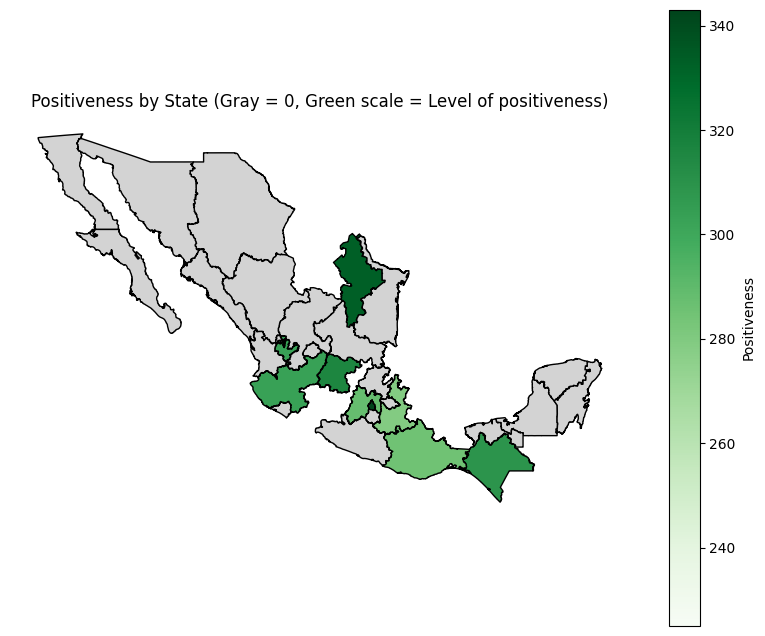

In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import numpy as np

# Load the map
mapaMxgj = gpd.read_file("https://github.com/jincera/CosasGeoref/raw/main/MapaMexico3.geojson")

# Positiveness data
positiveness_by_state = {
    'AGUASCALIENTES': 0,
    'BAJA CALIFORNIA': 0,
    'BAJA CALIFORNIA SUR': 0,
    'CAMPECHE': 0,
    'CHIAPAS': 309,
    'CHIHUAHUA': 0,
    'CIUDAD DE MEXICO': 343,
    'COAHUILA': 0,
    'COLIMA': 0,
    'DURANGO': 0,
    'GUANAJUATO': 316,
    'GUERRERO': 0,
    'HIDALGO': 0,
    'JALISCO': 303,
    'MEXICO': 288,
    'MICHOACAN': 270,
    'MORELOS': 0,
    'NAYARIT': 0,
    'NUEVO LEON': 333,
    'OAXACA': 285,
    'PUEBLA': 279,
    'QUERETARO': 0,
    'QUINTANA ROO': 0,
    'SAN LUIS POTOSI': 0,
    'SINALOA': 0,
    'SONORA': 0,
    'TABASCO': 0,
    'TAMAULIPAS': 0,
    'TLAXCALA': 0,
    'VERACRUZ': 225,
    'YUCATAN': 0,
    'ZACATECAS': 0,
}

# Create dataframe
df_positiveness = pd.DataFrame(list(positiveness_by_state.items()), columns=['Estado', 'positiveness'])

# Merge with map
mapaMxTot = gpd.GeoDataFrame.merge(mapaMxgj, df_positiveness, left_on="ENTIDAD", right_on="Estado")

# Create a color column
def get_color(val):
    if val == 0:
        return '#D3D3D3'  # Light gray
    else:
        # Normalize and use Greens colormap
        norm = plt.Normalize(df_positiveness[df_positiveness['positiveness'] > 0]['positiveness'].min(),
                             df_positiveness['positiveness'].max())
        cmap = plt.cm.Greens
        return mcolors.to_hex(cmap(norm(val)))

# Apply color
mapaMxTot['color'] = mapaMxTot['positiveness'].apply(get_color)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mapaMxTot.plot(color=mapaMxTot['color'], edgecolor='black', ax=ax)

# Create colorbar for the green scale
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(df_positiveness[df_positiveness['positiveness'] > 0]['positiveness'].min(),
                                                             df_positiveness['positiveness'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Positiveness')

plt.title('Positiveness by State (Gray = 0, Green scale = Level of positiveness)')
plt.axis('off')
plt.show()


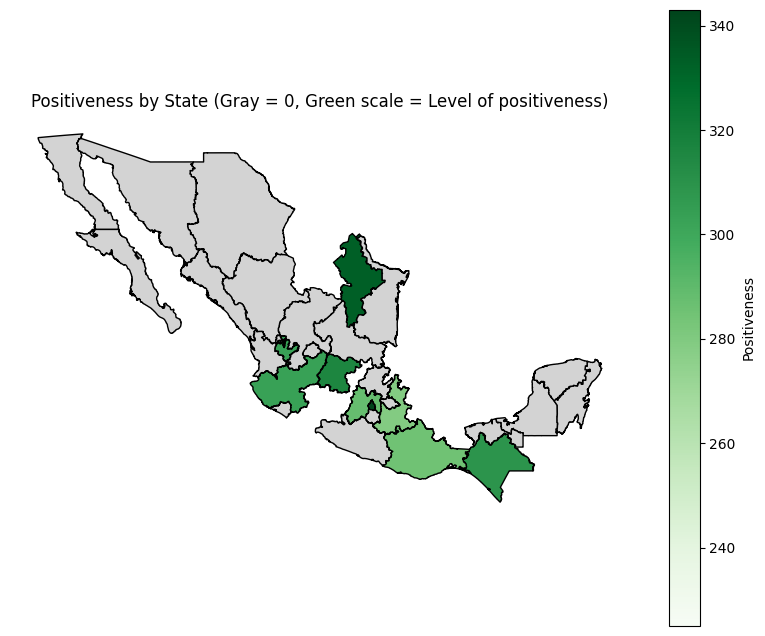

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import numpy as np

# Load the map
mapaMxgj = gpd.read_file("https://github.com/jincera/CosasGeoref/raw/main/MapaMexico3.geojson")

# Apply zero-distance buffer to fix geometries
mapaMxgj['geometry'] = mapaMxgj['geometry'].buffer(0)

# Positiveness data
positiveness_by_state = {
    'AGUASCALIENTES': 0,
    'BAJA CALIFORNIA': 0,
    'BAJA CALIFORNIA SUR': 0,
    'CAMPECHE': 0,
    'CHIAPAS': 309,
    'CHIHUAHUA': 0,
    'CIUDAD DE MEXICO': 343,
    'COAHUILA': 0,
    'COLIMA': 0,
    'DURANGO': 0,
    'GUANAJUATO': 316,
    'GUERRERO': 0,
    'HIDALGO': 0,
    'JALISCO': 303,
    'MEXICO': 288,
    'MICHOACAN': 270,
    'MORELOS': 0,
    'NAYARIT': 0,
    'NUEVO LEON': 333,
    'OAXACA': 285,
    'PUEBLA': 279,
    'QUERETARO': 0,
    'QUINTANA ROO': 0,
    'SAN LUIS POTOSI': 0,
    'SINALOA': 0,
    'SONORA': 0,
    'TABASCO': 0,
    'TAMAULIPAS': 0,
    'TLAXCALA': 0,
    'VERACRUZ': 225,
    'YUCATAN': 0,
    'ZACATECAS': 0,
}

# Create dataframe
df_positiveness = pd.DataFrame(list(positiveness_by_state.items()), columns=['Estado', 'positiveness'])

# Merge with map
mapaMxTot = gpd.GeoDataFrame.merge(mapaMxgj, df_positiveness, left_on="ENTIDAD", right_on="Estado")

# Create a color column
def get_color(val):
    if val == 0:
        return '#D3D3D3'  # Light gray
    else:
        # Normalize and use Greens colormap
        norm = plt.Normalize(df_positiveness[df_positiveness['positiveness'] > 0]['positiveness'].min(),
                             df_positiveness['positiveness'].max())
        cmap = plt.cm.Greens
        return mcolors.to_hex(cmap(norm(val)))

# Apply color
mapaMxTot['color'] = mapaMxTot['positiveness'].apply(get_color)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mapaMxTot.plot(color=mapaMxTot['color'], edgecolor='black', ax=ax)

# Create colorbar for the green scale
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(df_positiveness[df_positiveness['positiveness'] > 0]['positiveness'].min(),
                                                             df_positiveness['positiveness'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Positiveness')

plt.title('Positiveness by State (Gray = 0, Green scale = Level of positiveness)')
plt.axis('off')
plt.show()
